In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Getting Data Set 
df = pd.read_csv('Concrete_Data.csv')

In [3]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

# Exploratory data analysis

In [6]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### check and remove skewness from dataset by using feature transformation

In [7]:
df.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

In [8]:
df.kurtosis()

Cement              -0.520652
Blast               -0.508175
Fly Ash             -1.328746
Water                0.122082
Superplasticizer     1.411269
CA                  -0.599016
FA                  -0.102177
Age                 12.168989
CMS                 -0.313725
dtype: float64

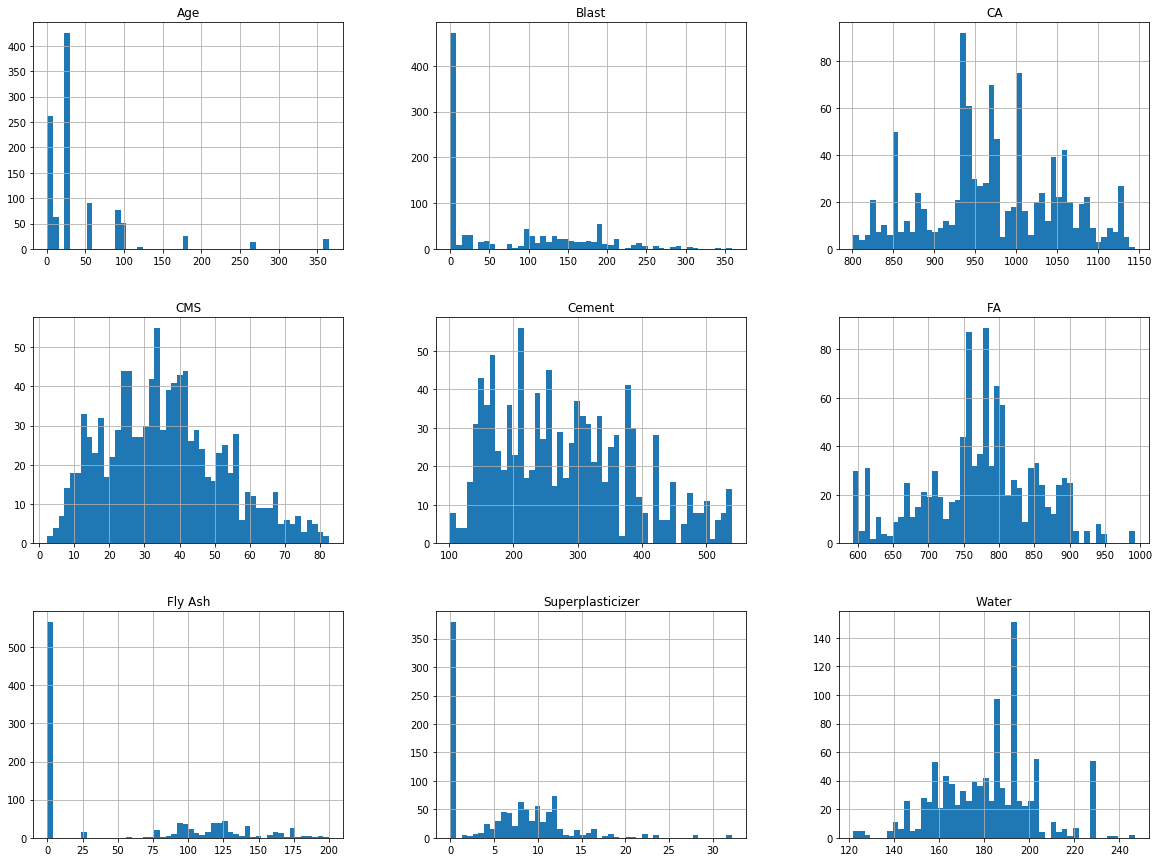

In [9]:
df.dropna().hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 0, 'sq_root-Age')

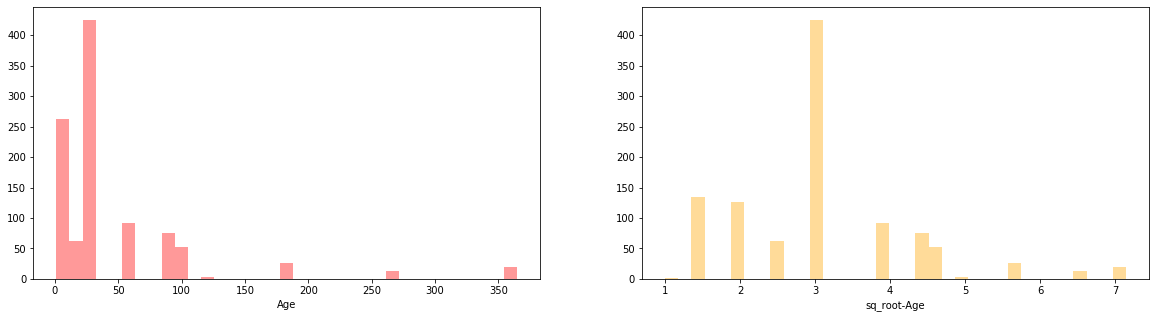

In [10]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.Age.dropna(), ax=ax[0], bins=35,kde=False, color="red")
sns.distplot(np.cbrt(df.Age.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("sq_root-Age")

In [11]:
print('Skewness: %f' % np.sqrt(df.Age.dropna().skew()))
print('Kurtsis: %f' % np.sqrt(df.Age.dropna().kurt()))

Skewness: 1.808087
Kurtsis: 3.488408


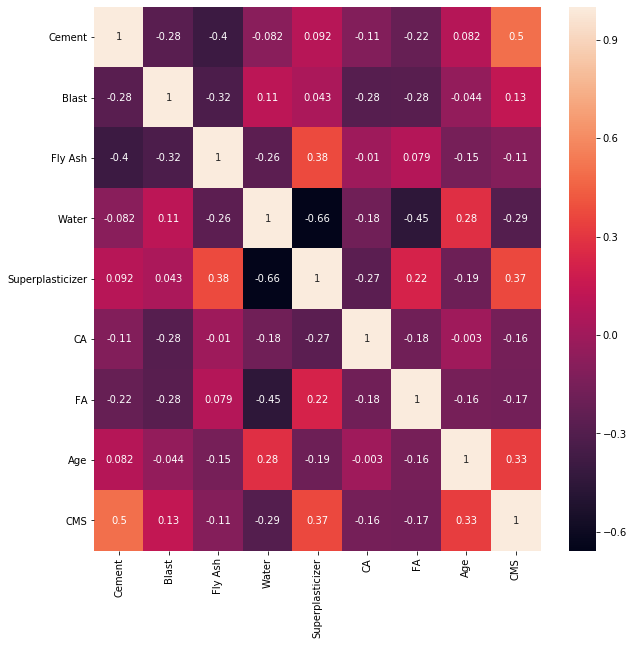

In [12]:
plt.figure(figsize=(10,10))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)

In [13]:
df.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


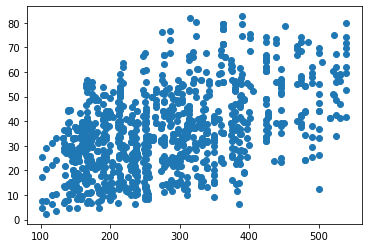

In [14]:
plt.scatter(df['Cement'],df['CMS'])

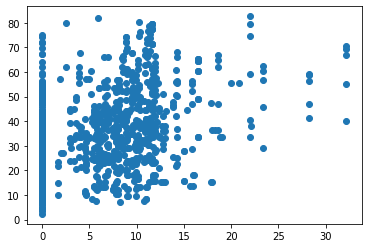

In [15]:
plt.scatter(df['Superplasticizer'],df['CMS'])

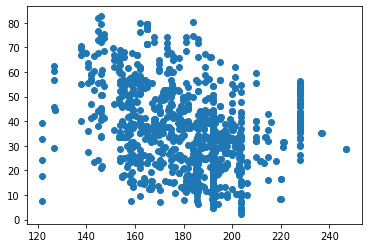

In [16]:
plt.scatter(df['Water'],df['CMS'])

# Model

In [17]:
#indenpendent variables
X= df.iloc[:,0:-1]
X['Age'] = np.cbrt(df.Age.dropna())
print(X.head())
#target variable(CMS)
y = df.iloc[:,-1]
y.head()

   Cement  Blast  Fly Ash  Water  Superplasticizer      CA     FA       Age
0   540.0    0.0      0.0  162.0               2.5  1040.0  676.0  3.036589
1   540.0    0.0      0.0  162.0               2.5  1055.0  676.0  3.036589
2   332.5  142.5      0.0  228.0               0.0   932.0  594.0  6.463304
3   332.5  142.5      0.0  228.0               0.0   932.0  594.0  7.146569
4   198.6  132.4      0.0  192.0               0.0   978.4  825.5  7.113787


0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: CMS, dtype: float64

In [18]:
#Splitting Test and Train Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 101)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(824, 8)
(206, 8)
(206,)
(824,)


In [19]:
#Using Multi-Linear Regression 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [20]:
#Using Validation Parameters
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.7594935336502364
76.25292676456321


### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [28]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 10,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_y_pred))
    test_r2 = r2_score(y_test,y_pred)
    train_r2 = r2_score(y_train,train_y_pred)
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_RMSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_RMSE) 
    
    print("\n The train_r2_score across ALL models:\n",
          train_r2)
                                    
    print("\n The test_r2_score across ALL models:\n",
          test_r2)
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.02, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.5, tree_method=None,
       validate_parameters=False, verbosity=None)

 The best score across ALL searched params:
 0.9389344696887275

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.5}

 The train_RMSE across ALL models:
 1.070385936970555

 The test_RMSE across A

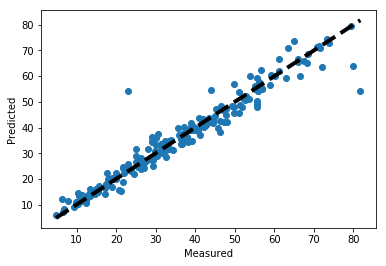

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.2, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9431063622651558

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.2}

 The train_RMSE across ALL models:
 1.0463614250861255

 The test_RMSE across ALL models:
 4.2720072791591

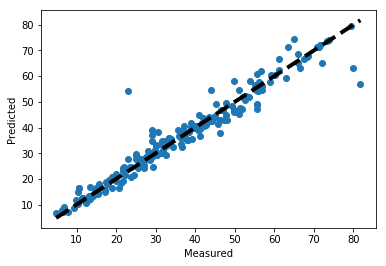

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=45, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8941860884901172

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 45}

 The train_RMSE across ALL models:
 2.967966360226703

 The test_RMSE across ALL models:
 5.656934270189222

 The train_r2_score across ALL models:
 0.9672832299271957

 The test_r2_score across ALL models:
 0.8990671572985456


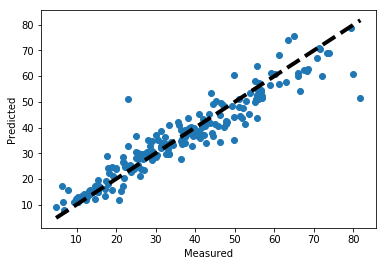

None



In [29]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                          
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

#### bar plot of features importances

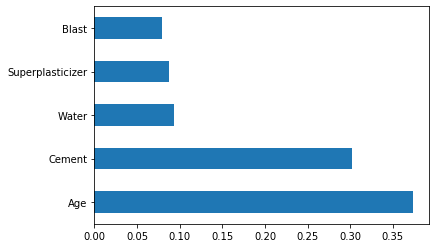

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

here,'Age' features is important for model.

## save model

In [22]:
import pickle

In [23]:
filename='Concrete_GradientBoostingRegressor_model.sav'

In [24]:
pickle.dump(model, open(filename, 'wb'))

In [25]:
load_lr_model =pickle.load(open(filename, 'rb'))